In [28]:
from collections import Counter
#from linear_algebra import sum_of_squares, dot
import math
import matplotlib.pyplot as plt
import numpy as np

### Chap 5: Statistics

#### Describing a Single Set of Data

With a small enough data set, simply looking at the data itself might be best.

But for larger datasets you need to distill and communicate relevant features of the data:

As a first approach we put the friend counts into a histogram using `Counter` and `plt.bar()`

In [29]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,
               10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,
               7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4
               ,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,
               2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [30]:
friend_counts = Counter(num_friends)
print (friend_counts)

Counter({1: 22, 6: 22, 3: 20, 4: 20, 9: 18, 2: 17, 5: 17, 7: 15, 10: 15, 8: 13, 13: 4, 15: 4, 12: 2, 14: 2, 18: 2, 19: 2, 21: 2, 11: 1, 16: 1, 25: 1, 100: 1, 40: 1, 41: 1, 49: 1})


For each distinct value the number of times it appears in the array is put into a dictionary and sorted from high to low number of counts.

In [31]:
xs = range(101) # largest value is 100
print(xs)

range(0, 101)


In [32]:
# loops over all numbers 1 - 100 and uses that as a key to pick out the counts.
ys = [friend_counts[x] for x in xs]
print(ys)

[0, 22, 17, 20, 20, 17, 22, 15, 13, 18, 15, 1, 2, 4, 2, 4, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


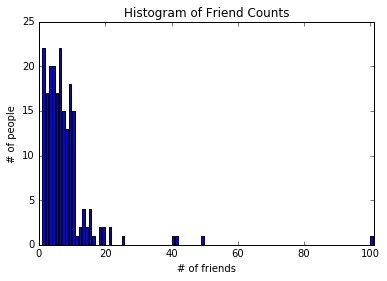

In [33]:
%matplotlib inline

plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

This is still not massively useful. So we will now generate some simple statistics: the number of data points:

In [34]:
num_points  = len(num_friends)
print(num_points)

204


In [35]:
# largest and smallest values
largest_value = max(num_friends)
smallest_value = min(num_friends)

In [36]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

print(smallest_value)
print(second_smallest_value)
print(second_largest_value)

1
1
49


#### Central Tendencies

Usually we'll want some notion of where our data is centered. Most commonly we'll use the *mean*, which is just the sum of the data divided by its count. The *median* is also commonly used.
The mean is very sensitive to outliers. 
A generalization of the median is the *quantile* which represents the value less than which a certain percentil of the data lies. 

### Dispersion

How spread out is our data? 
More complicated than just the range is *variance*:

In [40]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = np.mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has a least two elements"""
    n = len(x)
    deviations = de_mean(x) # deviation from the mean for each element in x
    return sum(np.square(deviations)) / (n - 1)

variance(num_friends)

81.543513957307155

As variance is in units that are the "square" of the original units, it is often better to look instead at the standard deviation:

In [41]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

Both the range and the standard deviation (square root of variance) have the same problem with outliers. 

A more robust alternative computes the difference between the 75th and 25th percentile value:

In [43]:
def quantile(x, p):
    """returns the pth-percentile values in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

def interquartile_range(x):
    return quantile(x,0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

This is quite nicely not affected by a small number of outliers.

### Correlation

Does the amount of time people people spend on the site relate to the number of friends they have there? 
We use a list `daily_minutes` that shows how many mins per day each user spends.

First we look at *covariance*, the paired analogue of variances. Where variance measures how a single variable deviates from its mean, covariance measures how two variables vary in tandem form their means:

In [46]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,
                 48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,
                 46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,
                 35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,
                 19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23
                 ,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07
                 ,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,
                 36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,
                 26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,
                 13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,
                 27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,
                 8.38,27.81,32.35,23.84]

In [49]:
def dot(v, w):
    """v_1 * w_1 + ...+ v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def covariance(x, y):
    """For each corresponding variance value in x and y arrays add together
    takes into account if variance is below for one variable and variance is above mean 
    in another"""
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

In [50]:
covariance(num_friends, daily_minutes)

22.425435139573057

A "large" +ve covariance means that x tends to be large when y is large and small when y is small. A "large" negative covariance means the opposite, when x is small, y is large and vice versa. A covariance cose to zero means that no such relationship exists.

Even then, there are a number of issues to take into account:
- It is hard to say what a "large" covariance is when a variable twice as large would have twice as large covariance. If each user had twice as many friends
- the units are the product of the inputs units.

So, it is more common to look at the correlation, which divides out the standard deviations of both variables:

In [51]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x /stdev_y
    else:
        return 0 # if no variance, correlation is zero
correlation(num_friends, daily_minutes)

0.24736957366478204

The `correlation` is unitless and always lies between -1 (perfect anti-correlation) and 1 (perfect correlation). 0.25 is a relative weak positive correlation. 
Remove outliers based on other information if you can.